In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных

In [157]:
df = pd.read_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/train.csv').set_index('Id')
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


<AxesSubplot:>

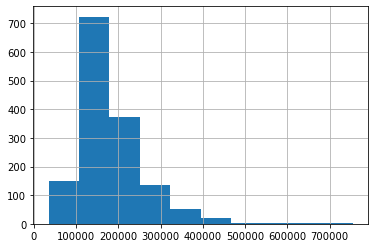

In [158]:
df['SalePrice'].hist()

In [159]:
df_test = pd.read_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/test.csv').set_index('Id')


# Заполнение Na 

## Основной DataSet

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [161]:
df_na=pd.DataFrame(df.isna().sum())

In [162]:
df_na[df_na[0]!=0]


,0
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [163]:
# Список названий колонок 'object'

col=df.select_dtypes(include='object').columns

#col=[i for i in col if i!='MasVnrArea']

In [164]:
# Заполнение Na значений в колоноках 'object'

for i in col:
    df[i]=df[i].fillna('no information')

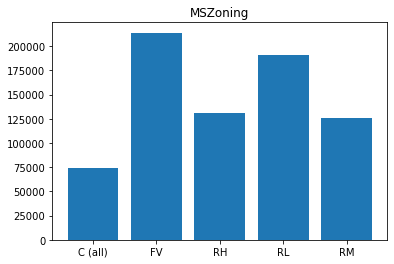

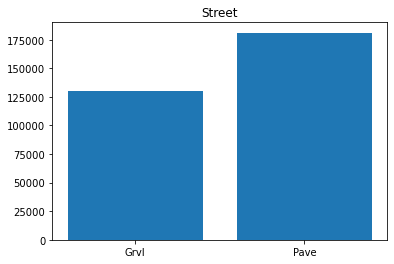

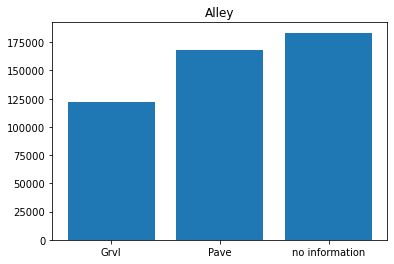

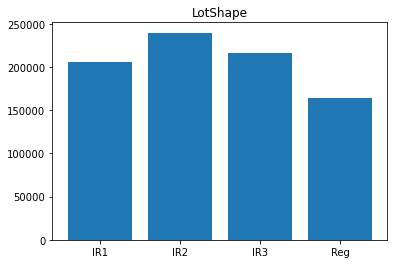

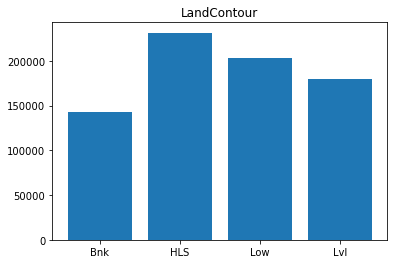

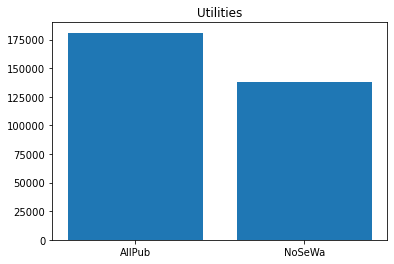

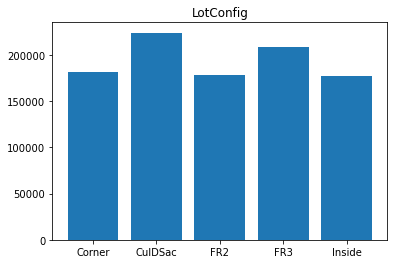

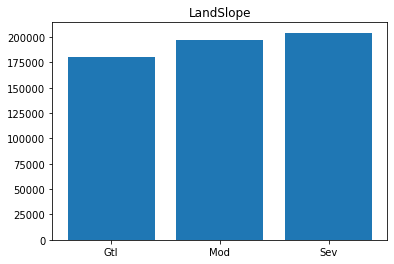

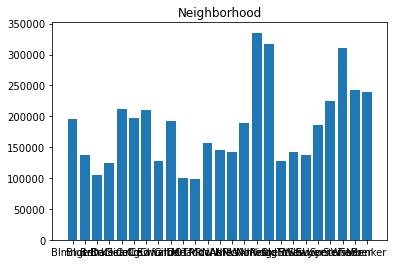

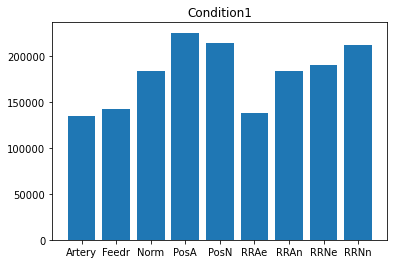

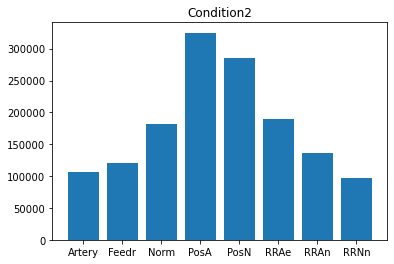

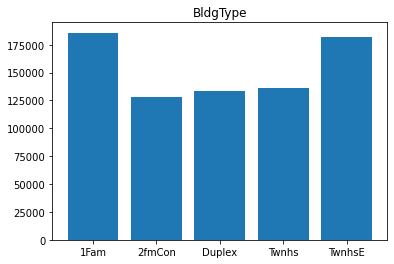

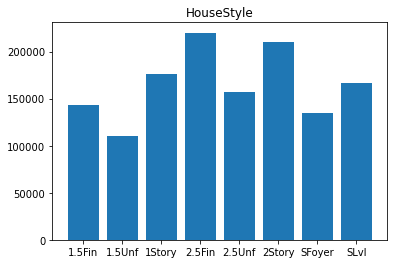

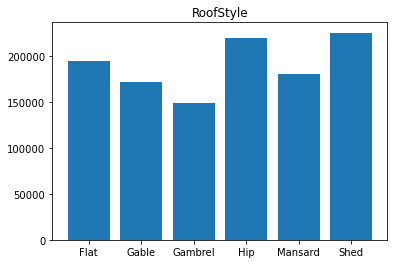

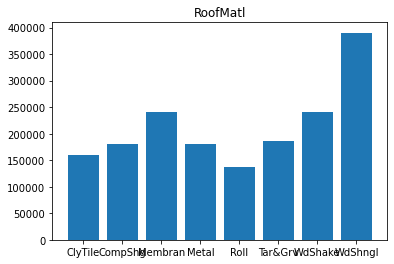

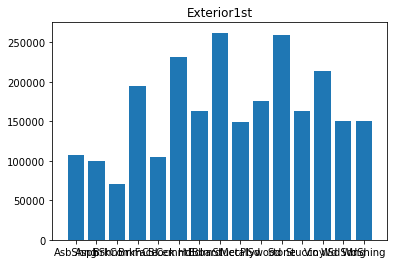

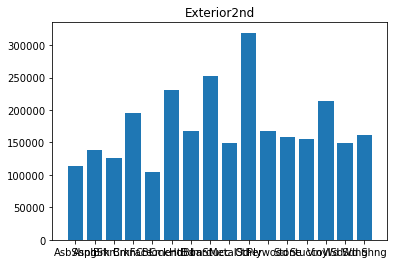

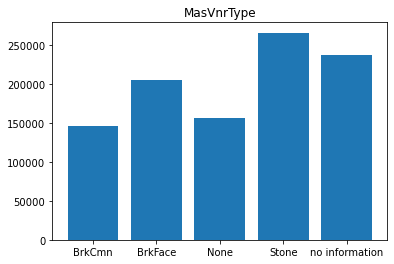

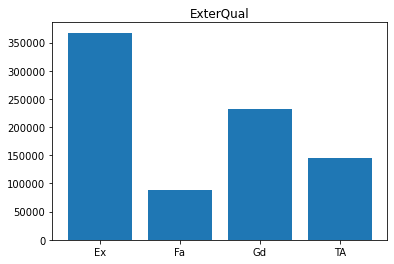

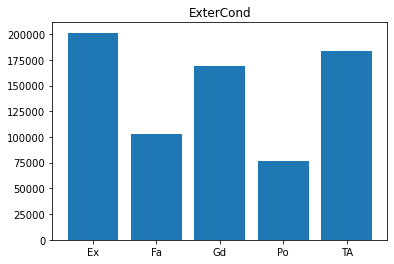

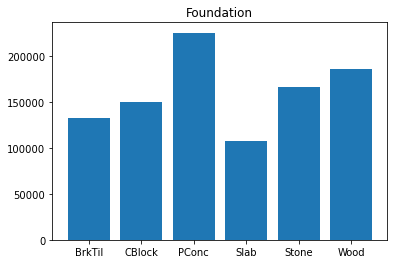

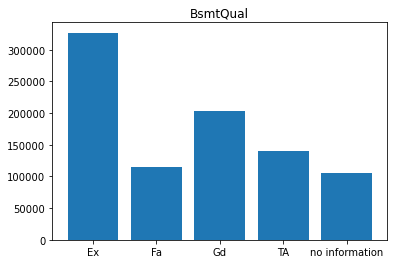

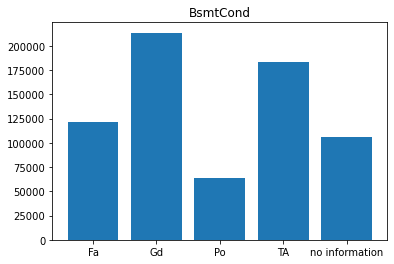

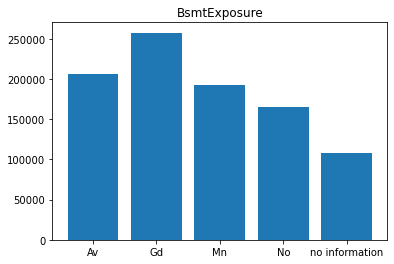

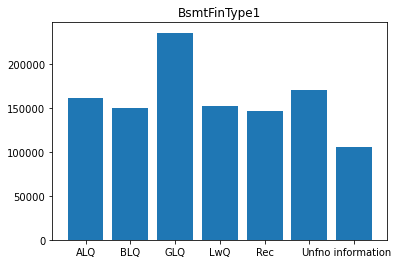

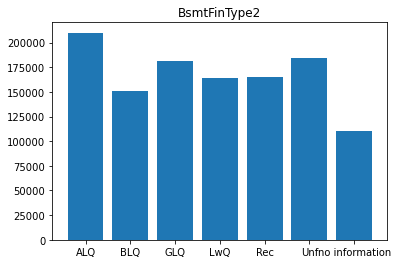

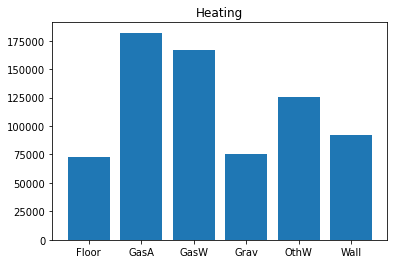

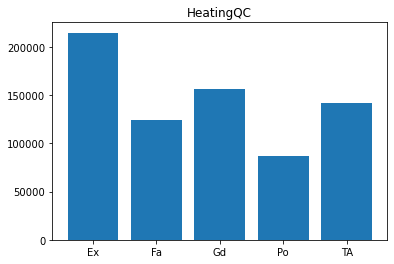

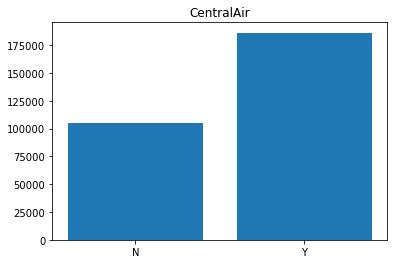

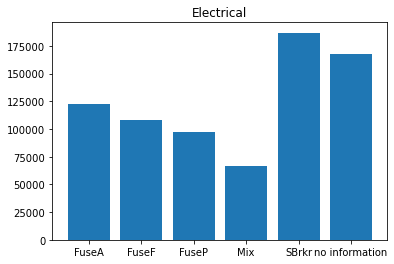

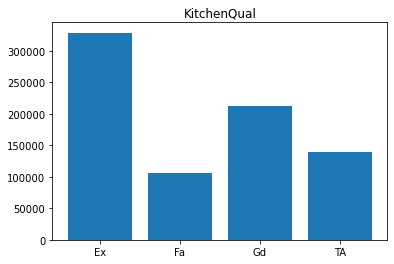

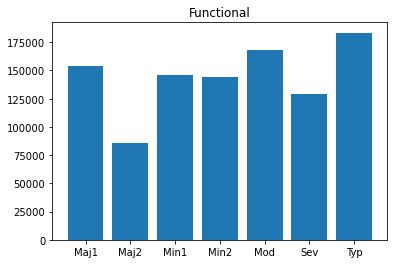

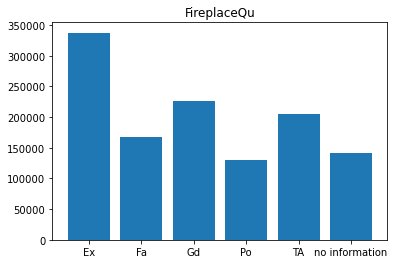

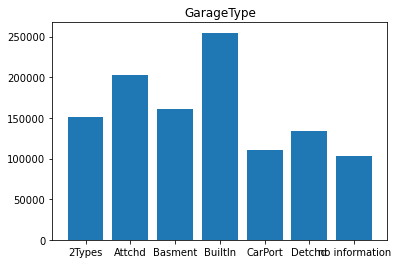

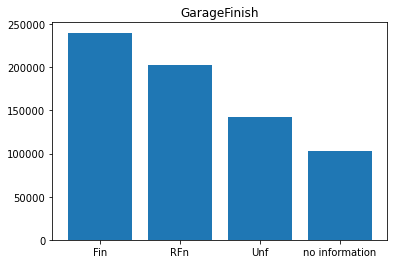

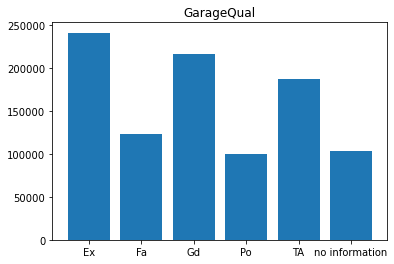

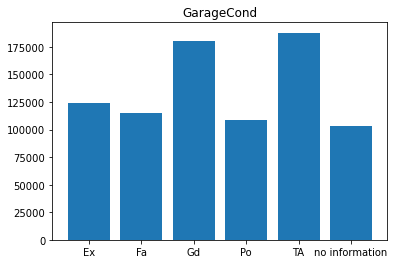

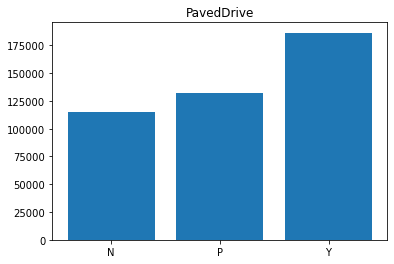

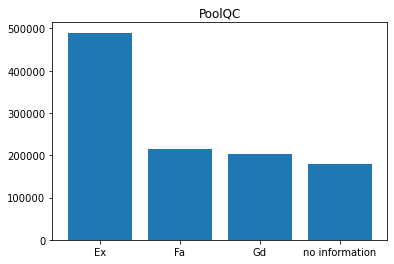

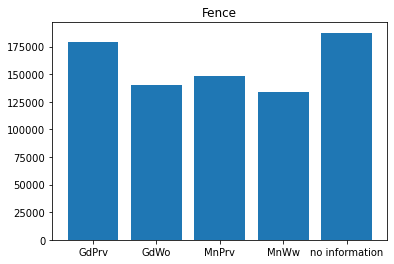

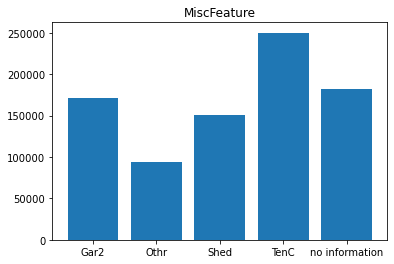

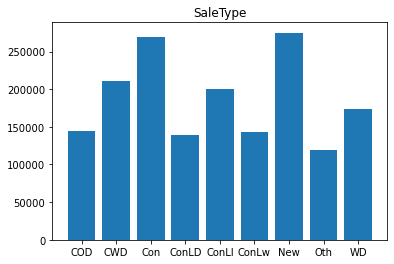

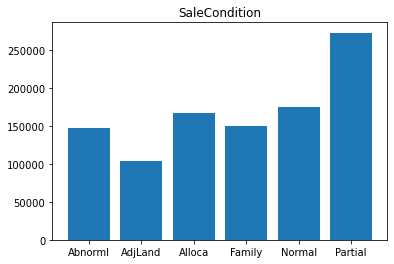

In [165]:
# анализ средней цены в зависимости от значения колонок 'object' 

for i in col:
    plt.title(i)
    plt.bar(df.groupby(i)[['SalePrice']].mean().round().index,df.groupby(i)[['SalePrice']].mean().round()['SalePrice'])
    plt.show()

In [166]:
# Заполнение Na значений в числовых колоноках 

df['LotFrontage']=df['LotFrontage'].fillna(round(df['LotFrontage'].mean(),1))

In [167]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(round(df['GarageYrBlt'].mean(),0))

In [168]:
df['MasVnrArea']=df['MasVnrArea'].fillna(round(df['MasVnrArea'].mean(),1))

## DataSet тестовый для kaggle

In [169]:
df_test_na=pd.DataFrame(df_test.isna().sum())

In [170]:
df_test_na[df_test_na[0]!=0]

,0
MSZoning,4
LotFrontage,227
Alley,1352
Utilities,2
Exterior1st,1
Exterior2nd,1
MasVnrType,16
MasVnrArea,15
BsmtQual,44
BsmtCond,45


In [171]:
# Заполнение Na значений в колоноках 'object'

for i in col:
    df_test[i]=df_test[i].fillna('no information')

In [172]:
# Заполнение Na значений в числовых колоноках 

df_test['LotFrontage']=df_test['LotFrontage'].fillna(round(df_test['LotFrontage'].mean(),1))

In [173]:
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(round(df_test['GarageYrBlt'].mean(),0))

In [174]:
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(round(df_test['MasVnrArea'].mean(),1))


In [175]:
# Заполнение Na , появившихся только в тестовой выборке

df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(round(df_test['BsmtFinSF1'].mean(),1))

In [176]:
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(round(df_test['BsmtFinSF2'].mean(),1))

In [177]:
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(round(df_test['TotalBsmtSF'].mean(),1))

In [178]:
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(round(df_test['BsmtUnfSF'].mean(),1))

In [179]:
df_test['GarageArea']=df_test['GarageArea'].fillna(round(df_test['GarageArea'].mean(),1))

<BarContainer object of 4 artists>

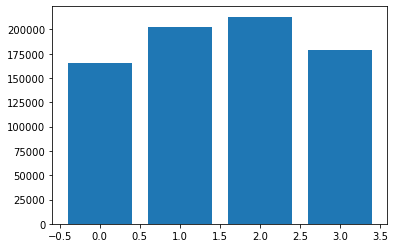

In [180]:
plt.bar(df.groupby('BsmtFullBath')[['SalePrice']].mean().round().index,df.groupby('BsmtFullBath')[['SalePrice']].mean().round()['SalePrice'])


In [181]:
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(1)#категориальные

<BarContainer object of 3 artists>

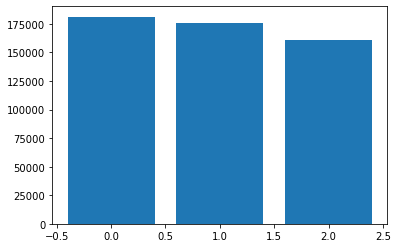

In [48]:
plt.bar(df.groupby('BsmtHalfBath')[['SalePrice']].mean().round().index,df.groupby('BsmtHalfBath')[['SalePrice']].mean().round()['SalePrice'])


In [182]:
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(1)#категориальные

<BarContainer object of 5 artists>

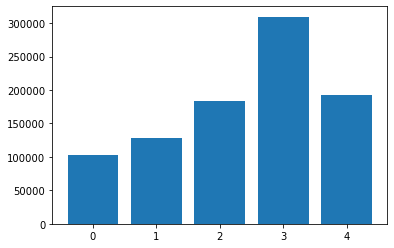

In [50]:
plt.bar(df.groupby('GarageCars')[['SalePrice']].mean().round().index,df.groupby('GarageCars')[['SalePrice']].mean().round()['SalePrice'])


In [183]:
df_test['GarageCars']=df_test['GarageCars'].fillna(2)# категориальные

# OneHotEncoder

## Формирование общего файла Основной датасет и тестовый 

In [184]:
## Добавление в тестовый файл столбца 'SalePrice'

df_test['SalePrice']=np.zeros(1459)
df_test.shape

(1459, 80)

In [185]:
df.shape

(1460, 80)

In [186]:
##Формирование общего файла Основной датасет и тестовый 

df_full=pd.concat([df, df_test])
df_full.shape

(2919, 80)

## Анализ числовых столбцов на категориальность

In [187]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

<BarContainer object of 2919 artists>

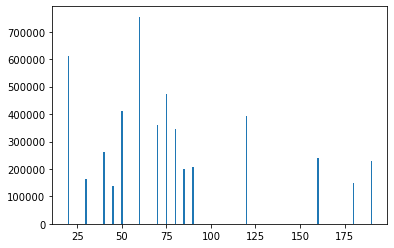

In [188]:
plt.bar(df_full['MSSubClass'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

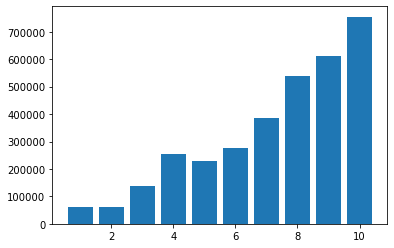

In [189]:
plt.bar(df_full['OverallQual'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

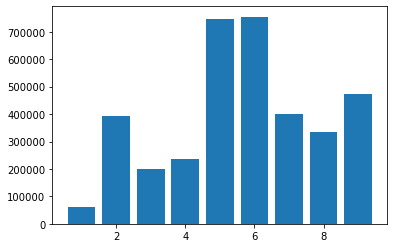

In [37]:
plt.bar(df_full['OverallCond'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

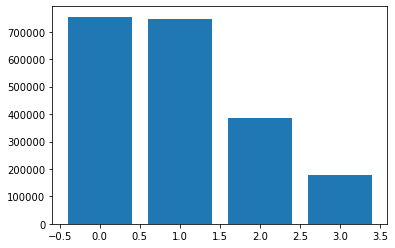

In [38]:
plt.bar(df_full['BsmtFullBath'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

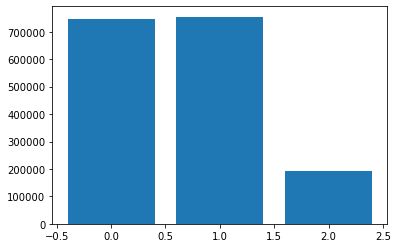

In [39]:
plt.bar(df_full['BsmtHalfBath'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

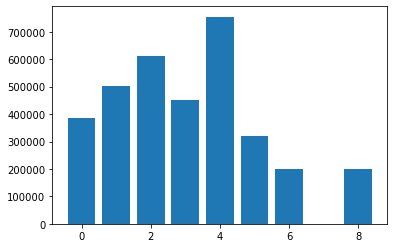

In [40]:
plt.bar(df_full['BedroomAbvGr'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

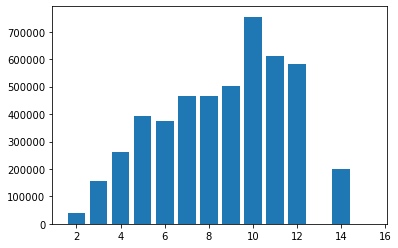

In [41]:
plt.bar(df_full['TotRmsAbvGrd'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

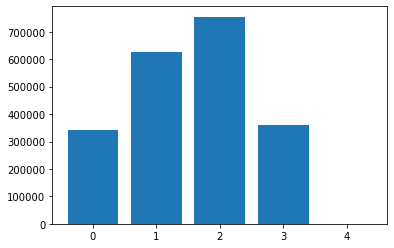

In [42]:
plt.bar(df_full['Fireplaces'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

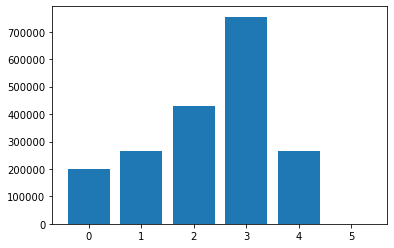

In [43]:
plt.bar(df_full['GarageCars'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

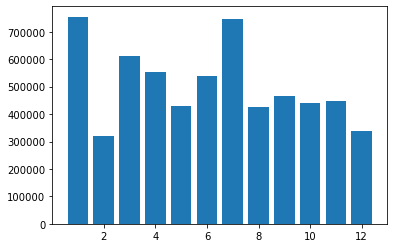

In [44]:
plt.bar(df_full['MoSold'],df_full['SalePrice'])

<BarContainer object of 2919 artists>

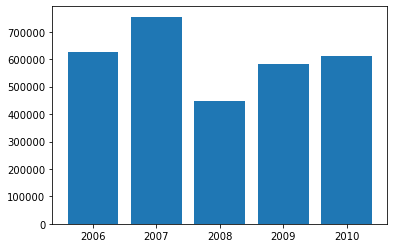

In [45]:
plt.bar(df_full['YrSold'],df_full['SalePrice'])

In [190]:
col_cat=list(col)+['YrSold','MoSold','GarageCars','Fireplaces','TotRmsAbvGrd','BedroomAbvGr','BsmtHalfBath','BsmtFullBath','OverallCond','OverallQual','MSSubClass']

## Добавление категориальных столбцов

In [191]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False) #Will return sparse matrix if set True else will return an array.


onehot_encoder.fit(df_full[col_cat])
cat_enc_cols = [f'{c}_{el}' for arr, c in zip(onehot_encoder.categories_, col_cat) for el in arr]
one_frame =  pd.DataFrame(onehot_encoder.transform(df_full[col_cat]),
                          columns=cat_enc_cols,index=df_full.index)

one_frame

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_no information,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,...,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
Id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2916,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [192]:
df_full

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,no information,Reg,Lvl,AllPub,Inside,...,0,no information,no information,no information,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,no information,Reg,Lvl,AllPub,FR2,...,0,no information,no information,no information,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,no information,IR1,Lvl,AllPub,Inside,...,0,no information,no information,no information,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,no information,IR1,Lvl,AllPub,Corner,...,0,no information,no information,no information,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,no information,IR1,Lvl,AllPub,FR2,...,0,no information,no information,no information,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,no information,Reg,Lvl,AllPub,Inside,...,0,no information,no information,no information,0,6,2006,WD,Normal,0.0
2916,160,RM,21.0,1894,Pave,no information,Reg,Lvl,AllPub,Inside,...,0,no information,no information,no information,0,4,2006,WD,Abnorml,0.0
2917,20,RL,160.0,20000,Pave,no information,Reg,Lvl,AllPub,Inside,...,0,no information,no information,no information,0,9,2006,WD,Abnorml,0.0


## Формирование Датасетов основного, тестового, тестового Кагл

In [403]:
df_test_kaggle=pd.merge(df_full, one_frame, on ='Id')[1460:]   #test kaggle

In [404]:
df_=pd.merge(df_full, one_frame, on ='Id')[:1240]  #train general


In [405]:
df_test_=pd.merge(df_full, one_frame, on ='Id')[1240:1460]   #test general


In [196]:
df_for_teaching=pd.merge(df_full, one_frame, on ='Id')[:1460]

# Подготовка фичей и таргета для моделей

In [197]:
cat_enc_cols.remove('RoofMatl_ClyTile')

In [198]:
features=[
    'LotFrontage',
    'LotArea',
    'YearBuilt',   
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'FullBath',
    'HalfBath',
    'KitchenAbvGr',
    'GarageYrBlt',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    *cat_enc_cols
]

In [199]:
target=['SalePrice']

In [200]:
x= df_for_teaching[features].to_numpy()
y = np.log(df_for_teaching[target].to_numpy())
x.shape, y.shape

((1460, 391), (1460, 1))

In [201]:
# нормализуем всю выборку сразу и обучаем на всей выборке, поскольку разбиение внутри cv

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)

In [202]:
# test,train

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1022, 391), (438, 391), (1022, 1), (438, 1))

In [203]:
x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)
x_train_norm.shape, x_test_norm.shape

((1022, 391), (438, 391))

# Обучение RidgeRegressor

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_squared_error

# создаем объект, не задавая параметры. Можно задать параметры, которые не будет изменяться при GS
reg1 = Ridge()

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'alpha': [0.1,1.0,10.0],
    'fit_intercept': [True,False],
    'normalize': [True,False],
    'tol':[1e-4,1e-3,1e-2],#Precision of the solution.
    'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
   
}

# создаем объект
cv = GridSearchCV(
    estimator=reg1,
    param_grid=param_grid,
    scoring=make_scorer(lambda t,p: mean_squared_error(t,p)**.5, greater_is_better=False),
    cv=5, # количество фолдов
    verbose=4, # сколько печатать сообщений
    n_jobs=-1, # насколько параллелельно считаем
)

In [126]:
cv.fit(x_norm, y)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             scoring=make_scorer(<lambda>, greater_is_better=False), verbose=4)

In [146]:
reg1=cv.best_estimator_.fit(x_train_norm,y_train)

In [147]:
print("train acc:", mean_squared_error( y_train,reg1.predict(x_train_norm))**.5)
print("test acc:", mean_squared_error( y_test,reg1.predict(x_test_norm))**.5)

train acc: 0.09218397272237042
test acc: 0.14804137632559072


In [145]:
# линейные веса параметров: чем больше по модулю, тем больше влияние
pd.DataFrame(zip(features, reg1.coef_[0])).sort_values(by=1, key=lambda r: -abs(r))

,0,1
12,GrLivArea,7885.937176
122,RoofMatl_WdShngl,7192.977995
77,Neighborhood_StoneBr,7178.741867
319,GarageCars_3.0,6042.473313
9,1stFlrSF,5908.163689
...,...,...
340,TotRmsAbvGrd_15,0.000000
338,TotRmsAbvGrd_13,0.000000
46,Utilities_no information,0.000000
155,Exterior2nd_no information,0.000000


## Формирование данных для кагл

In [135]:
x_test_kaggle=df_test_kaggle[features].to_numpy()

In [136]:
x_test_norm_kaggle=scaler.transform(x_test_kaggle)

In [137]:
y_pred_test_kaggle = np.exp(reg1.predict(x_test_norm_kaggle))
y_pred_test_kaggle

array([[126153.86595761],
       [163686.06426295],
       [172434.20848741],
       ...,
       [170207.16262791],
       [110879.814977  ],
       [213549.09417516]])

In [138]:
df_kaggle = pd.read_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/sample_submission.csv')
df_kaggle

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [139]:
df_kaggle['SalePrice']=y_pred_test_kaggle

In [140]:
df_kaggle.to_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv',index=False)

In [141]:
pd.read_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv')

,Id,SalePrice
0,1461,126153.865958
1,1462,163686.064263
2,1463,172434.208487
3,1464,193826.433985
4,1465,195813.297926
...,...,...
1454,2915,82144.998898
1455,2916,82524.566523
1456,2917,170207.162628
1457,2918,110879.814977


# GradientBoostingRegressor

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_log_error


# создаем объект, не задавая параметры. Можно задать параметры, которые не будет изменяться при GS
clf = GradientBoostingRegressor()

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'tol': [1e-5,1e-4,1e-3],
    'learning_rate': [0.01,0.1,1],
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'max_depth':[2,3,5,10],
   # 'n_estimators':[100,1000],
   # 'max_features':['auto', 'sqrt', 'log2'],
   
}

# создаем объект
cv = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring=make_scorer(lambda t,p: mean_squared_error(t,p)**.5, greater_is_better=False),
    cv=5, # количество фолдов
    verbose=4, # сколько печатать сообщений
    n_jobs=-1, # насколько параллелельно считаем
)

In [149]:
cv.fit(x_norm, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/home/sv/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': [2, 3, 5, 10],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(<lambda>, greater_is_better=False), verbose=4)

In [150]:
clf=cv.best_estimator_.fit(x_train_norm,y_train)

/home/sv/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [151]:
print("train :", mean_squared_error( y_train,clf.predict(x_train_norm))**.5)
print("test :", mean_squared_error( y_test,clf.predict(x_test_norm))**.5)

train : 0.08240066671963268
test : 0.15111113743173646


## Формирование данных для кагл

In [152]:
y_pred_test_kaggle = clf.predict(x_test_norm_kaggle)
y_pred_test_kaggle

array([11.76236838, 11.9086212 , 12.17728548, ..., 11.96883855,
       11.75470715, 12.24152186])

In [153]:
df_kaggle['SalePrice']=np.exp(y_pred_test_kaggle)

In [154]:
df_kaggle.to_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv',index=False)

In [155]:
pd.read_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv')

,Id,SalePrice
0,1461,128331.030431
1,1462,148541.728828
2,1463,194324.646833
3,1464,186202.323440
4,1465,192090.038754
...,...,...
1454,2915,80471.094921
1455,2916,78083.866087
1456,2917,157761.322553
1457,2918,127351.613304


# RandomForestRegressor

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_log_error

# создаем объект, не задавая параметры. Можно задать параметры, которые не будет изменяться при GS
reg = RandomForestRegressor()

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'n_estimators': [100,1000],
    'max_depth': [5,3],
    'min_samples_leaf': [1,5,10],
    'criterion': ['mse','mae'],
    'min_samples_split':[2,5,10],
    'max_features':[2,4]
   
}

# создаем объект
cv = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    scoring=make_scorer(lambda t,p: mean_squared_log_error(t,p)**.5, greater_is_better=False),
    cv=5, # количество фолдов
    verbose=4, # сколько печатать сообщений
    n_jobs=-1, # насколько параллелельно считаем
)

In [230]:
cv.fit(x_train_norm, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/home/sv/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [5, 3],
                         'max_features': [2, 4], 'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 1000]},
             scoring=make_scorer(<lambda>, greater_is_better=False), verbose=4)

In [231]:
reg=cv.best_estimator_.fit(x_train_norm,y_train)



print("train acc:", mean_squared_log_error( y_train,reg.predict(x_train_norm))**.5)
print("test acc:", mean_squared_log_error( y_test,reg.predict(x_test_norm))**.5)


<ipython-input-231-ebc15ee27b93>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg=cv.best_estimator_.fit(x_train_norm,y_train)


train acc: 0.23638301182742574
test acc: 0.2852849867974516


# что сделать



- сохранить обработанный дата фрейм
- сохранить модели в файлы


# XGBRegressor()

In [224]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import make_scorer, mean_squared_error

# создаем объект, не задавая параметры. Можно задать параметры, которые не будет изменяться при GS
xgb = xgb.XGBRegressor()

# будут рассмотрены все возможные комбинаци этих значений
param_grid = {
    'colsample_bytree': [0.4603,],
    'gamma':[0.0468,],
    'learning_rate':[0.05,],
    'max_depth':[2,3], 
    'min_child_weight':[1.7817,],
    'n_estimators':[2200,],
    'reg_alpha':[0.4640,],
    'reg_lambda':[0.8571,],
    'subsample':[0.5213,],
    'silent':[1,2],
    'random_state' :[7,],
    'nthread' : [-1,]
   
}

# создаем объект
cv = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring=make_scorer(lambda t,p: mean_squared_error(t,p)**.5, greater_is_better=False),
    cv=5, # количество фолдов
    verbose=4, # сколько печатать сообщений
    n_jobs=-1, # насколько параллелельно считаем
)

In [225]:
cv.fit(x_norm, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[20:17:40] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4603], 'gamma': [0.0468],
                         'learning_rate': [0.05], 'max_depth': [2, 3],
                         'min_child_weight': [1.7817], 'n_estimators':

In [227]:
xgb=cv.best_estimator_.fit(x_train_norm,y_train)



print("train acc:", mean_squared_error( y_train,xgb.predict(x_train_norm))**.5)
print("test acc:", mean_squared_error( y_test,xgb.predict(x_test_norm))**.5)


[21:11:28] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


train acc: 0.08341866979029308
test acc: 0.1470699226273205


In [228]:
y_pred_test_kaggle = xgb.predict(x_test_norm_kaggle)
y_pred_test_kaggle

array([11.77283 , 11.948781, 12.186301, ..., 11.890212, 11.713369,
       12.272052], dtype=float32)

In [229]:
df_kaggle['SalePrice']=np.exp(y_pred_test_kaggle)

In [230]:
df_kaggle.to_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv',index=False)

In [231]:
pd.read_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv')

,Id,SalePrice
0,1461,129680.63
1,1462,154628.55
2,1463,196084.55
3,1464,206521.56
4,1465,182486.14
...,...,...
1454,2915,84006.61
1455,2916,87877.37
1456,2917,145832.23
1457,2918,122194.50


# Averaged base models class

In [251]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_ ])
        return np.mean(predictions, axis=1)   

In [262]:
averaged_models = AveragingModels(models = (reg1, xgb, clf))

In [263]:
av=averaged_models.fit(x_train_norm,y_train)

[22:01:50] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/sv/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [306]:
print("train acc:", mean_squared_error( y_train,av.predict(x_train_norm))**.5)
print("test acc:", mean_squared_error( y_test,av.predict(x_test_norm))**.5)

train acc: 0.07756833553483553
test acc: 0.1409264619739453


In [291]:
av_pred=av.predict(x_test_norm_kaggle)

In [265]:
df_kaggle['SalePrice']=np.exp(y_pred_test_kaggle)

In [266]:
df_kaggle.to_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv',index=False)

In [267]:
pd.read_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv')

,Id,SalePrice
0,1461,129680.63
1,1462,154628.55
2,1463,196084.55
3,1464,206521.56
4,1465,182486.14
...,...,...
1454,2915,84006.61
1455,2916,87877.37
1456,2917,145832.23
1457,2918,122194.50


# Stacking averaged Models Class

In [368]:
from sklearn.model_selection import KFold
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, )
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [369]:
stacked_averaged_models = StackingAveragedModels(base_models = (clf, xgb),
                                                 meta_model = reg1)

In [370]:
av_stack=stacked_averaged_models.fit(x_train_norm,y_train)

/home/sv/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sv/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sv/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/sv/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

[23:21:21] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:21:23] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:21:25] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:21:27] WARNING: ..

In [371]:
print("train acc:", mean_squared_error( y_train,av_stack.predict(x_train_norm))**.5)
print("test acc:", mean_squared_error( y_test,av_stack.predict(x_test_norm))**.5)

train acc: 0.08420598201835132
test acc: 0.14541991512031271


In [372]:
av_stack_pred=av_stack.predict(x_test_norm_kaggle)

In [373]:
df_kaggle['SalePrice']=np.exp(y_pred_test_kaggle)

In [374]:
df_kaggle.to_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv',index=False)

In [375]:
pd.read_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv')

,Id,SalePrice
0,1461,129680.63
1,1462,154628.55
2,1463,196084.55
3,1464,206521.56
4,1465,182486.14
...,...,...
1454,2915,84006.61
1455,2916,87877.37
1456,2917,145832.23
1457,2918,122194.50


# Подбор коэффициентов моделей

In [376]:
reg1 # Ridge

Ridge(alpha=10.0, solver='saga', tol=0.01)

In [377]:
av_stack # Stacking 

StackingAveragedModels(base_models=(GradientBoostingRegressor(loss='huber',
                                                              tol=0.001),
                                    XGBRegressor(base_score=0.5,
                                                 booster='gbtree',
                                                 colsample_bylevel=1,
                                                 colsample_bynode=1,
                                                 colsample_bytree=0.4603,
                                                 gamma=0.0468, gpu_id=-1,
                                                 importance_type='gain',
                                                 interaction_constraints='',
                                                 learning_rate=0.05,
                                                 max_delta_step=0, max_depth=2,
                                                 min_child_weight=1.7817,
                                                 missing=n

In [378]:
av # Averaged base model

AveragingModels(models=(Ridge(alpha=10.0, solver='saga', tol=0.01),
                        XGBRegressor(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.4603, gamma=0.0468,
                                     gpu_id=-1, importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.05, max_delta_step=0,
                                     max_depth=2, min_child_weight=1.7817,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=2200, n_jobs=8, nthread=-1,
                                     num_parallel_tree=1, random_state=7,
                                     reg_alpha=0.464, reg_lambda=0.8571,
                                     scale_pos_weight=1, silent=1,
                                     subsample=0.52

In [379]:
xgb # XGBRegressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=8, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, silent=1, subsample=0.5213,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [380]:
clf # GradientBoosting

GradientBoostingRegressor(loss='huber', tol=0.001)

In [381]:
# Функция для подбора коэффициента
def coef(a,b,c,d,e):
    if a+b+c+d+e!=1:
        print('mistake')
    res_train=a*(av_stack.predict(x_train_norm))+b*(av.predict(x_train_norm))+c*(xgb.predict(x_train_norm))+d*clf.predict(x_train_norm)+e*reg1.predict(x_train_norm)
    res_test=a*(av_stack.predict(x_test_norm))+b*(av.predict(x_test_norm))+c*(xgb.predict(x_test_norm))+d*clf.predict(x_test_norm)+e*reg1.predict(x_test_norm)
    print("train acc:", mean_squared_error( y_train,res_train[0])**.5)
    print("test acc:", mean_squared_error( y_test,res_test[0])**.5)
    

In [382]:
coef(a=0,b=0.7,c=0.3,d=0,e=0)

train acc: 0.07838716200791633
test acc: 0.14198648076043185


In [396]:
coef(a=0.0,b=0.95,c=0.05,d=0.0,e=0.0)

train acc: 0.07764607596259622
test acc: 0.1410549738982602


## Загрузка лучшего результата на кагл

In [354]:
ensemble = np.exp(av_pred)*0.95 + np.exp(xgb.predict(x_test_norm_kaggle))*0.05


In [358]:
df_kaggle['SalePrice']=ensemble

In [359]:
df_kaggle.to_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv',index=False)

In [360]:
pd.read_csv('/home/sv/Загрузки/house-prices-advanced-regression-techniques/result.csv')

,Id,SalePrice
0,1461,128085.380201
1,1462,155610.874935
2,1463,187960.574315
3,1464,195953.119930
4,1465,189853.118885
...,...,...
1454,2915,82035.705890
1455,2916,82628.652738
1456,2917,157007.358171
1457,2918,119917.948371


### 0.13257 kaggle result